# Introduction

> ### Dataset: 

>This dataset is a subset of [Yelp's](https://www.kaggle.com/yelp-dataset) businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. 

> ### About this notebook:

> In this notebook, I will deep dive into the Yelp datasets and find meaningful information about restaurants. If you have any suggestions feel free to reach me through my email: habibullochutboev@gmail.com. 

### Table of contents:
1. [Load the data](#load_the_data)
2. [Find nearby Restaurants in map](#find_nearby_restaurants)
3. [Top rated restaurants](#let_see_some_top_rated_rest)
4. [Analyze some of the popular restaurants](#ana_popu_restu)

<a id="load_the_data"></a>
# 1. Load the data: you can find the link for dataset in the links.txt file
> Let's load our necessary libraries and datasets for this notebook. I will load the yelp_business.CSV file using pandas.  And then preprocess the file for analysis. 

In [2]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re 
import string 
import nltk 
from textblob import TextBlob

# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact


%matplotlib inline

In [3]:
# import yelp_business.csv using pandas read_csv method
df_yelp_business = pd.read_csv('./yelp_business.csv')

In [4]:
# categories column has many categories at once. 
# Let's split the categories column and store each category in it's own column
df_category_split = df_yelp_business['categories'].str.split(';', expand=True)[[0,1,2]]

df_category_split.columns = ['category_1', 'category_2', 'category_3']
df_yelp_business = pd.concat([df_yelp_business, df_category_split], axis=1)

# now drop the actual categories column
df_yelp_business = df_yelp_business.drop(['categories'], axis=1)

# print the head of the dataset
df_yelp_business.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                      category_1                    category_2  \
0                       Dentists             General Dentistry   
1                  Hair Stylists                   Hair Salons   
2  Departments of Motor Vehicles  Public Services & Government   
3                 Sporting Goods                      Shopping   
4                 American (New)                     Nightlife   

          category_3  
0   Health & Medical  
1  Men's Hair Salons  
2               None  
3               None  
4               Bars

<a id="find_nearby_restaurants"></a>
# 2. Find nearby Restaurants in map
> In this section, I will try to make a map where each restaurant on Yelp will show. The user can zoom or move the cursor to find their desire restaurants. When the mouse hovers in each restaurants icon a text will pop up and show the restaurant's name and it's rating on Yelp. Let's see! 

In [5]:
# Filter out only restaurants
df_yelp_business_restaurants = df_yelp_business.loc[(df_yelp_business['category_1'] == 'Restaurants') | (df_yelp_business['category_2'] == 'Restaurants') | (df_yelp_business['category_3'] == 'Restaurants')]

In [6]:
# Only name and stars for map hover description
fff = df_yelp_business_restaurants[['name', 'stars']].astype(str).apply(lambda x: '. Rating: '.join(x), axis=1).tolist()

In [7]:
# mapbox access token. You can get it from mapbox.com
mapbox_access_token = 'pk.eyJ1IjoiaGFiaWJ1bGxvIiwiYSI6ImNseGswczJkMTIzYnAybXEwaWhlaDRzcWcifQ.Fp6gWdtq1pJKAV4cdYMkcQ'

# difine our data for ploting on mapbox
data = Data([
    Scattermapbox(
        lat=df_yelp_business_restaurants.latitude.tolist(),
        lon=df_yelp_business_restaurants.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=fff,
    )
])

layout = Layout(
    # add a title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add an access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to the map
        center=dict(
            lat=39.4440302947,
            lon=-98.9565517008
        ),
        # use style light
        style='light',
        pitch=0,
        # zoom label to 3
        zoom=3
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')

c:\Users\20231116\Desktop\big_data\env\Lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


c:\Users\20231116\Desktop\big_data\env\Lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




<a id="let_see_some_top_rated_rest"></a>
# 3 . Top rated restaurants
> Yelp is a collection of different business in different areas. In Yelp the most popular business is Restaurants business. Yelp has a huge collection of restaurants. It's quite impossible to plot that thousands of business ratings. So I take top 20 most occurrences restaurants and calculate their mean of stars review's polarity and plot them and see which is most popular restaurants. 

In [8]:
# import yelp_review.csv file
# this dataset contains all of the business customer reviews and their date
df_yelp_review = pd.read_csv('yelp_review.csv')
# import yelp_tip.csv file. 
# this dataset contains user tips for business.
df_yelp_tip = pd.read_csv('yelp_tip.csv')

In [9]:
# df_yelp_review dataset has business id but don't have businesss name.
# But df_yelp_business_restaurants have business name and business id.
# So I take the df_yelp_review business_id and match with df_yelp_business_restaurants business id.
# And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_review that holds business name
df_yelp_review['name'] = df_yelp_review['business_id'].map(df_yelp_business_restaurants.set_index('business_id')['name'])


# take the top only 20 most occurances restaurants for analysis. Because the dataset has over thousand business id. It will be really inefficient if we take all of the business name
top_restaurants = df_yelp_review.name.value_counts().index[:20].tolist()

# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_restaurants'
df_review_top = df_yelp_review.loc[df_yelp_review['name'].isin(top_restaurants)]



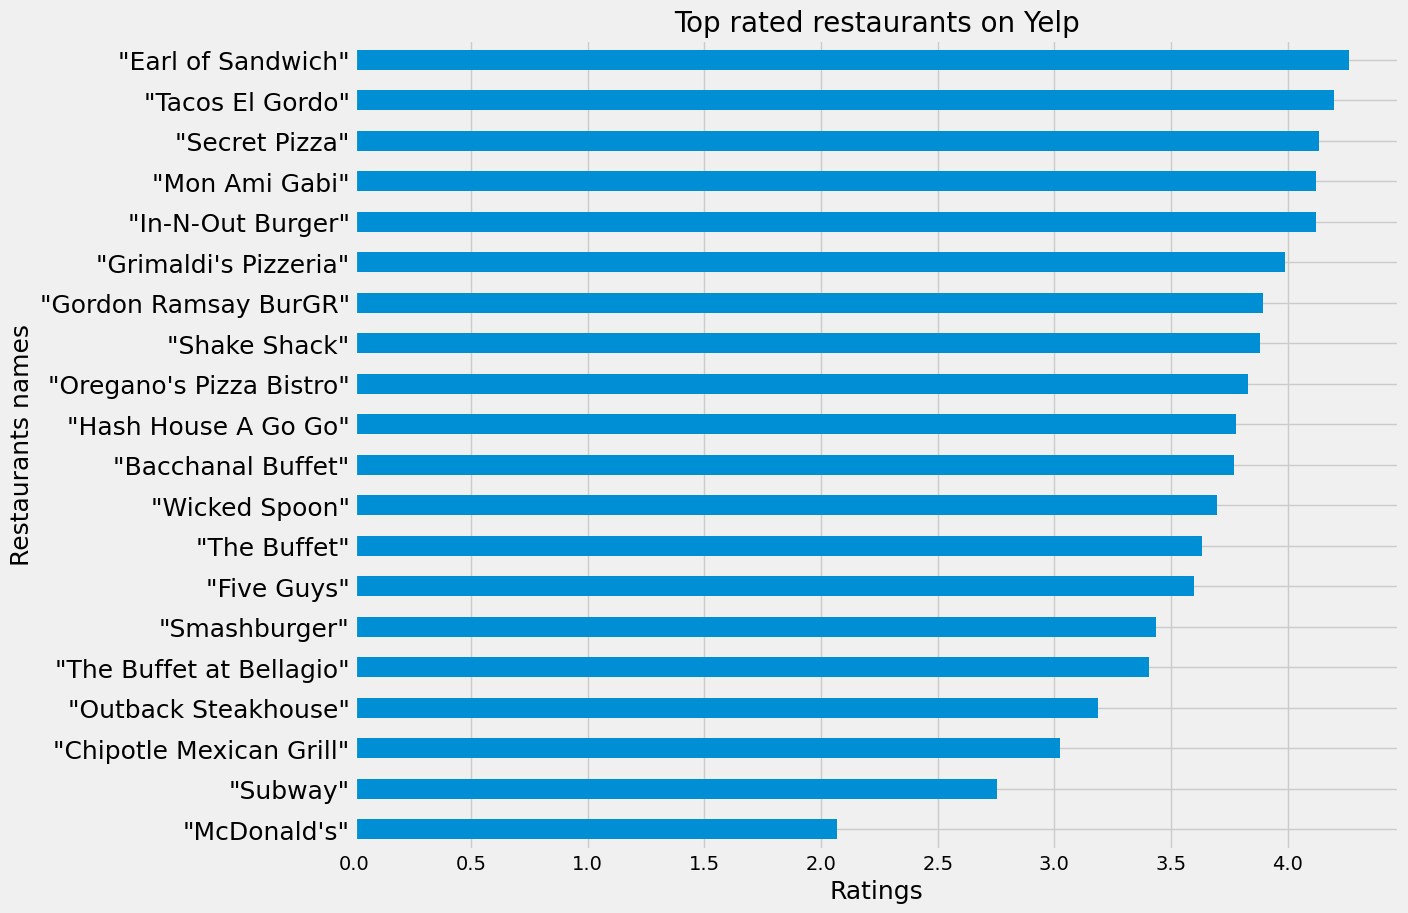

In [10]:
# now we take the name column and count mean of stars of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 
# then plot the graph
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
# set y ticks font size to 18 for easy readable purposes.
plt.yticks(fontsize=18)
# set the title of the graph
plt.title('Top rated restaurants on Yelp',fontsize=20)
# set y label of the graph and change fontsize to 18 for readablity purposes. 
plt.ylabel('Restaurants names', fontsize=18)
# set x label to 'Ratings'
plt.xlabel('Ratings', fontsize=18)
# now finally show the graph in a new window. 
plt.show()

This graph shows top-rated restaurants in an ascending order. 

In [11]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
df_review_top['text_clear'] = df_review_top['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

df_review_top['senti_polarity'] = df_review_top['text_clear'].apply(sentiment)

In [12]:
df_review_top.head()

review_id                 user_id             business_id  \
3    IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
191  pcszB9oTZE2DNylbbXIZAg  tL2pS5UOmN6aAOi3Z-qFGg  yLiaMaJFq03JxXPk4puloQ   
205  BtusuryKgaJ5ljO1JWiS9g  tL2pS5UOmN6aAOi3Z-qFGg  T8-8C1C7QwxzZcMGK_8H4A   
209  JsGASokYzaRrp_yfefxSRQ  tL2pS5UOmN6aAOi3Z-qFGg  QhMhM3Mhokv6V-H0MRuYTg   
259  dr9fhsNLgzkUJY3oj2QK6g  tL2pS5UOmN6aAOi3Z-qFGg  diY31IEunbV8MfDh81FS1A   

     stars        date                                               text  \
3        4  2016-05-28  Love coming here. Yes the place always needs t...   
191      3  2017-04-20  I've stopped in here several times. It's alway...   
205      3  2013-04-22  A few of us from our company had lunch here to...   
209      2  2013-05-19  I work in the area so have eaten at this locat...   
259      2  2013-01-23  I love a good burger! Can't say I love this pl...   

     useful  funny  cool                  name  \
3         0      0     0           "Five Guys"   
191       1      2     1          "McDonald's"   
205       0      0     0  "Hash House A Go Go"   
209       1      0     1          "McDonald's"   
259       0      0     0         "Smashburger"   

                                            text_clear  senti_polarity  
3    love coming yes place always needs floor swept...        0.070000  
191  ive stopped several times always busy seem mov...        0.171704  
205  us company lunch today planned eating buffet i...        0.201708  
209  work area eaten location numerous times locati...        0.047186  
259  love good burger cant say love place excited t...        0.203846

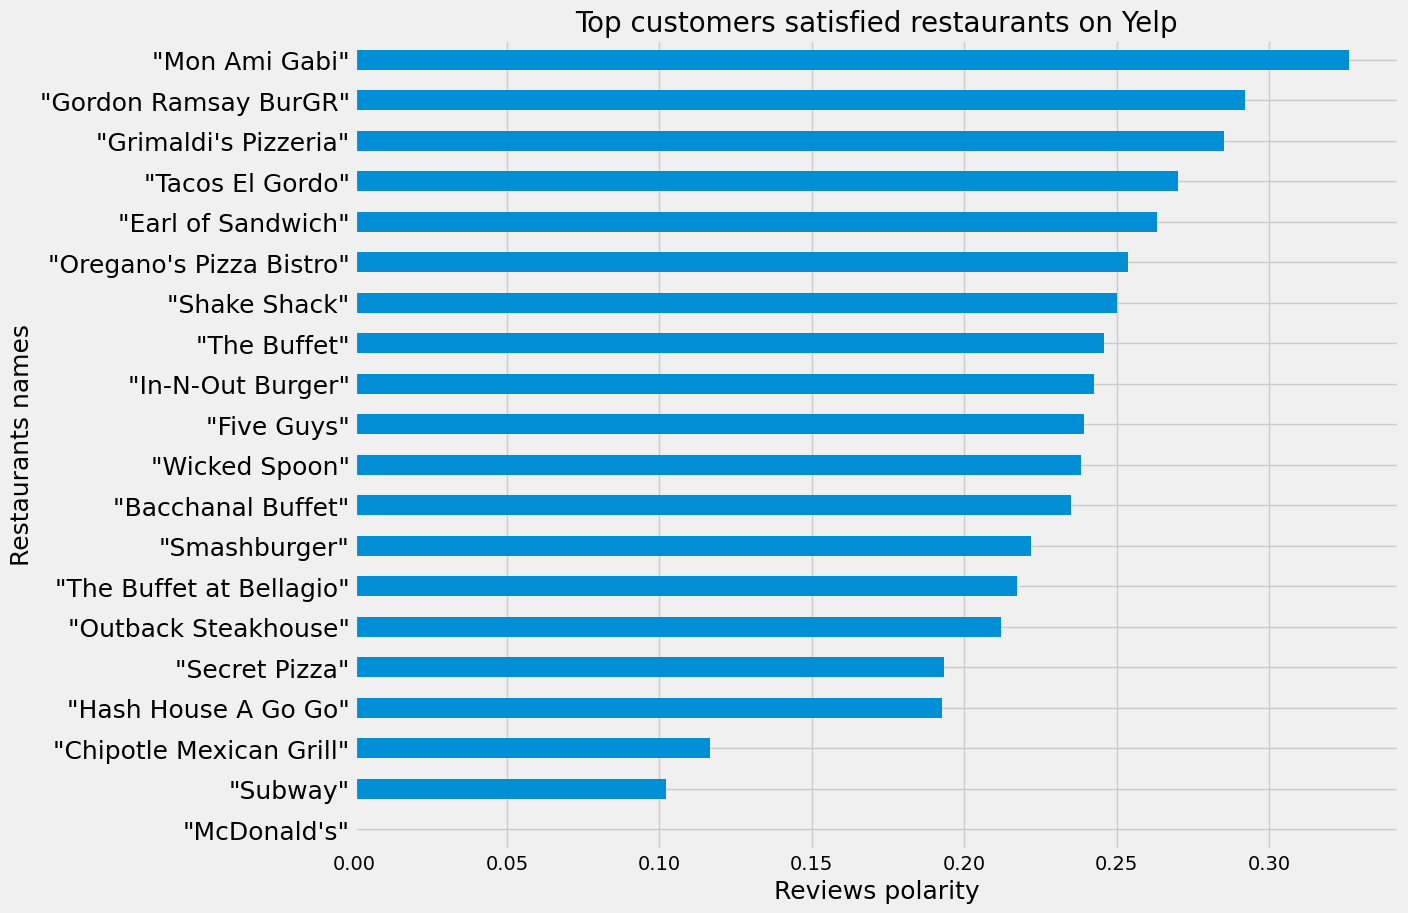

In [13]:
df_review_top.groupby(df_review_top.name)['senti_polarity'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
# set y ticks font size to 18 for easy readable purposes.
plt.yticks(fontsize=18)
# set the title of the graph
plt.title('Top customers satisfied restaurants on Yelp',fontsize=20)
# set y label of the graph and change fontsize to 18 for readablity purposes. 
plt.ylabel('Restaurants names', fontsize=18)
# set x label to 'Ratings'
plt.xlabel('Reviews polarity', fontsize=18)
# now finally show the graph in a new window. 
plt.show()

> ### Useful Votes: Indicate that other users found the review helpful in making a decision.
> ### Funny Votes: Suggest that other users found the review humorous.
> ### Cool Votes: Often mean that the review was interesting, stylish, or presented in a particularly engaging way.
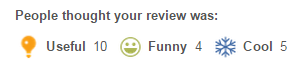

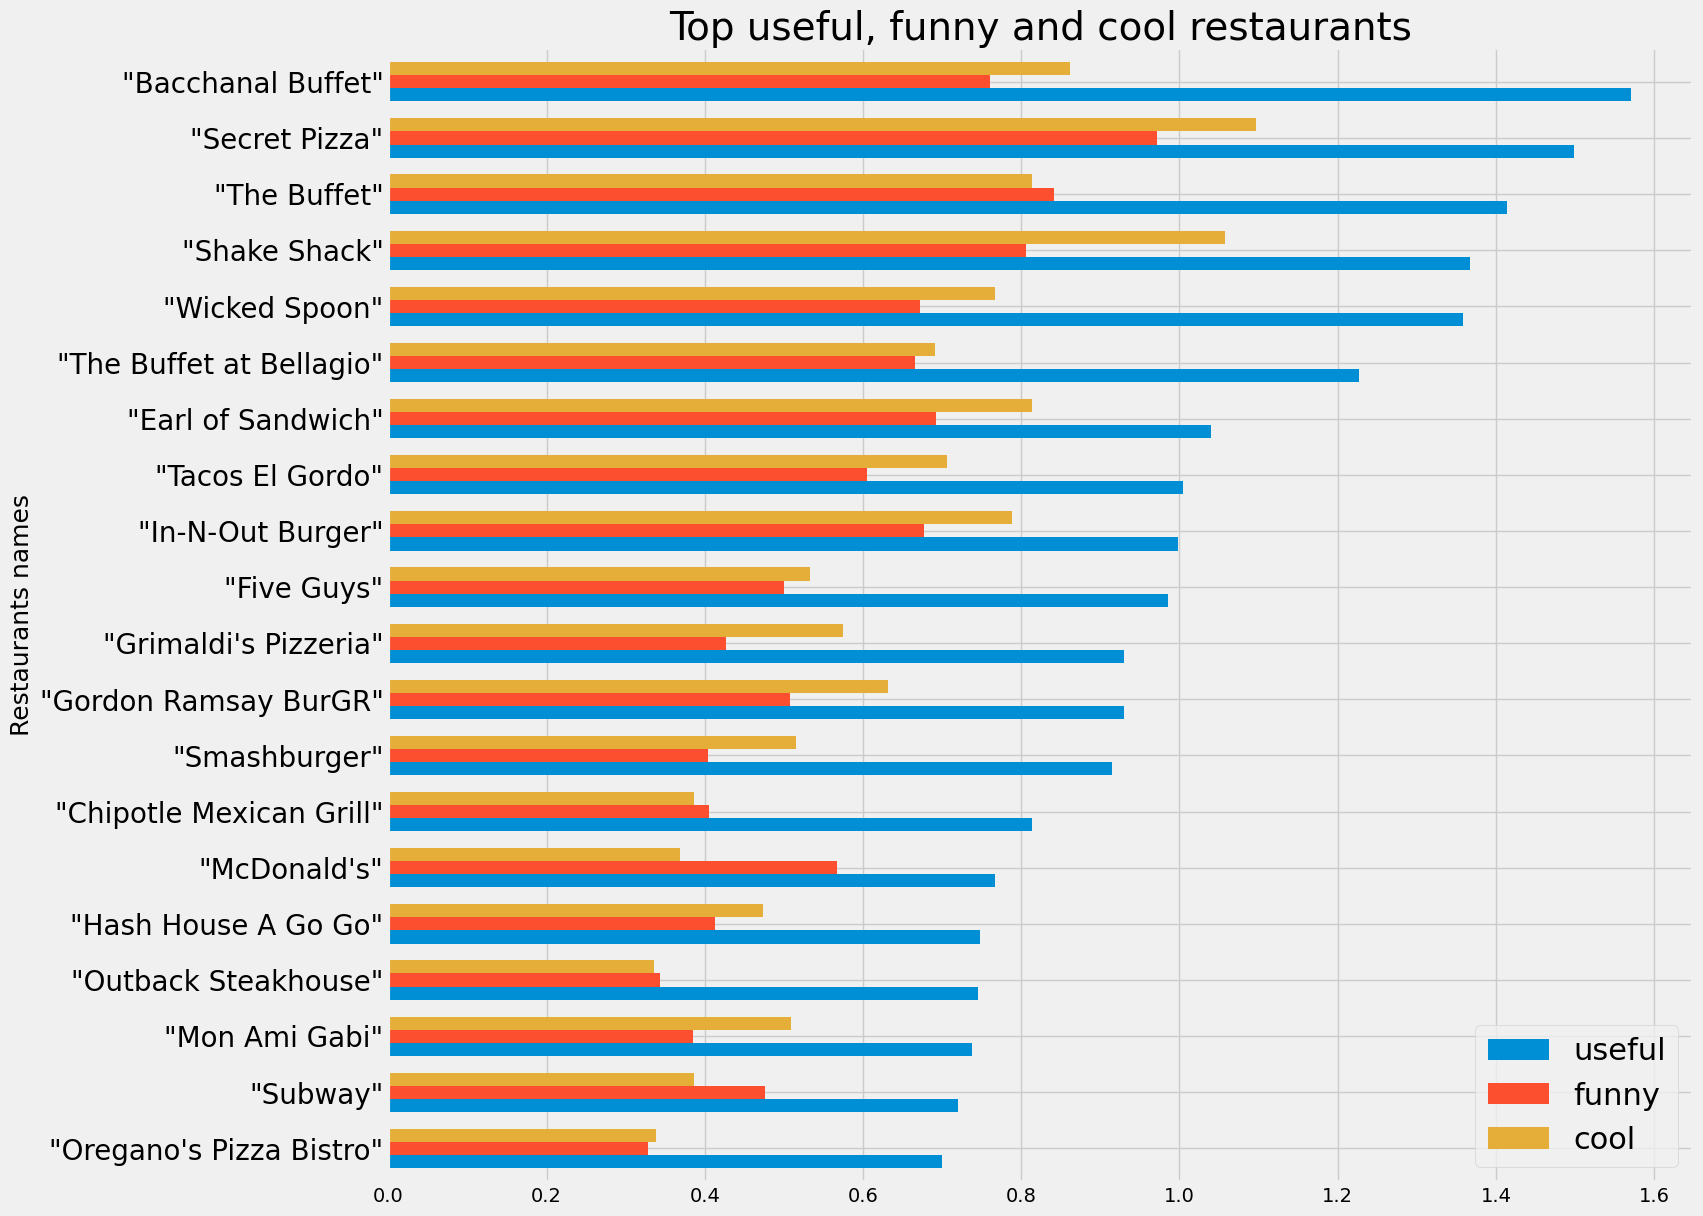

In [14]:
# now we take the name column and count mean of 'useful','funny', 'cool' of each unique business name
# then sort values in ascending order 
# then plot the graph
df_review_top.groupby(df_review_top.name)[['useful','funny', 'cool']].mean().sort_values('useful',ascending=True).plot(kind='barh', figsize=(15, 14),width=0.7)
# set y ticks font size to 18 for easy readable purposes.
plt.yticks(fontsize=18)
# set the title of the graph
plt.title('Top useful, funny and cool restaurants',fontsize=28)
# set y label of the graph and change fontsize to 18 for readablity purposes.
plt.ylabel('Restaurants names', fontsize=18)
# set the y ticks
plt.yticks(fontsize=20)
plt.legend(fontsize=22)
# finally show the plot
plt.show()

It looks like Bacchanal Buffet is the most useful restaurant.

In [15]:
# function for pre-processing the text of reviews
# this function remove punctuation and stopwords
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)

# df_yelp_tip dataset has business id but don't have businesss name.
# But df_yelp_business_restaurants have business name and business id.
# So I take the df_yelp_tip business_id and match with df_yelp_business_restaurants business id.
# And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_tip that holds business name
df_yelp_tip['name'] = df_yelp_tip['business_id'].map(df_yelp_business_restaurants.set_index('business_id')['name'])
# create a new dataframe called 'df_yelp_tip_top' that only contains the reviews of 'top_restaurants'
df_yelp_tip_top = df_yelp_tip.loc[df_yelp_tip['name'].isin(top_restaurants)]
# pre process the text
df_yelp_tip_top['text_clear'] = df_yelp_tip_top['text'].apply(preprocess)

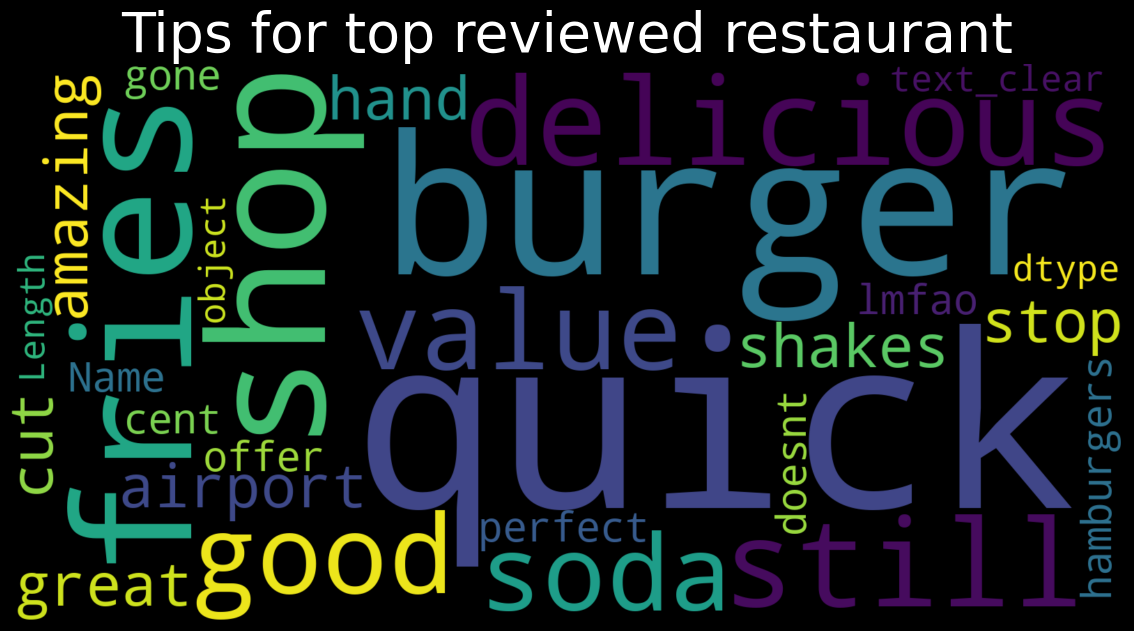

In [16]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df_yelp_tip_top['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Tips for top reviewed restaurant", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()


> It looks like 'Burger', 'good', 'fires' and 'quick' stands out in the crowd. 

<a id="ana_popu_restu"></a>
# 4. Analyze some of the popular restaurants
> Yelp has a lot of popular restaurants. Let's analyse some of the popular restaurants. In this section, we'll see each restaurant's reviews word cloud, sentiment analysis of reviews ,mean stars in different years, usefulness and others qualities of some random popular restaurants. 

1. [Analyze Earl of Sandwich restaurant reviews](#earl_of_sandwich)
2. [Analyze McDonald's restaurant reviews](#mcdonalds)
3. [Analyze Subway's restaurant reviews](#subways_reviews)

<a id="earl_of_sandwich"></a>
### 1. Earl of Sandwich
![](http://earlenterprise.com/_assets/images/GroupEvents/EOS/eos-sandwich.jpg)
> Earl of Sandwich is a noble title in the Peerage of England, nominally associated with Sandwich, Kent. It was created in 1660 for the prominent naval commander Admiral Sir Edward Montagu. In this section, I will be analyzing 'Earl of Sandwitch' restaurants data.  


In [17]:
# filter Earl of Sandwitch
df_earl_of_sandwitch_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == '"Earl of Sandwich"']
# filter reviews for only Earl of Sandwich
df_earl_of_sandwitch_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_earl_of_sandwitch_only.business_id)]

# clear the text
df_earl_of_sandwitch_review['text_clear'] = df_earl_of_sandwitch_review['text'].apply(preprocess)

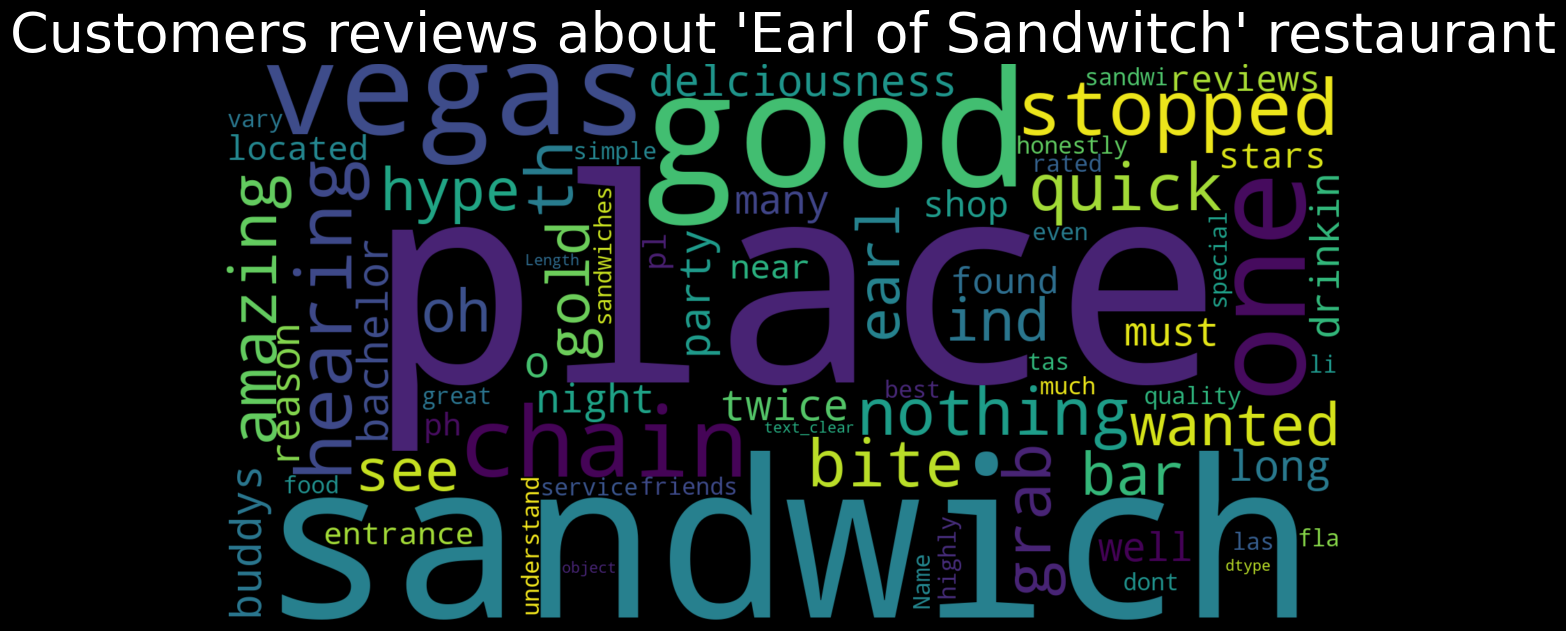

In [18]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_earl_of_sandwitch_review['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Customers reviews about 'Earl of Sandwitch' restaurant", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of configuration finally plot the graph
plt.show()

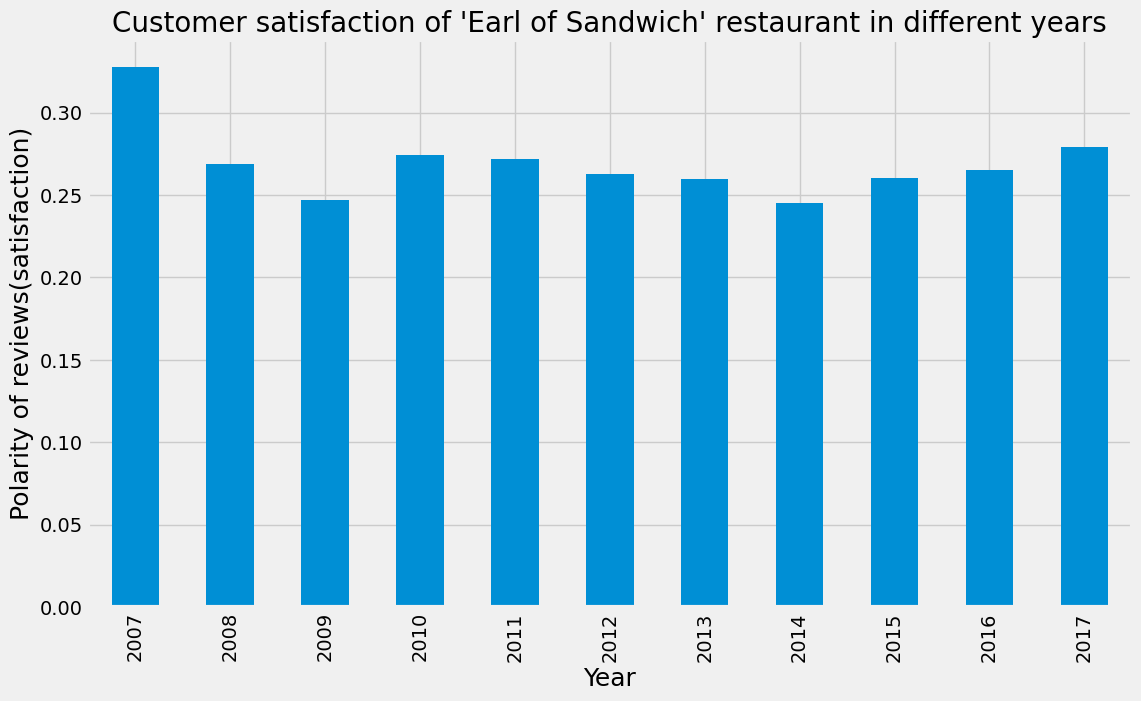

In [19]:
df_earl_of_sandwitch_review['senti_polarity'] = df_earl_of_sandwitch_review['text_clear'].apply(sentiment)
# convert date column to pandas datatime 
df_earl_of_sandwitch_review.date = pd.to_datetime(df_earl_of_sandwitch_review.date)
# now we take the date column as base and count mean of stars of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_earl_of_sandwitch_review.groupby(df_earl_of_sandwitch_review.date.dt.year)['senti_polarity'].mean().plot(kind='bar', figsize=(12, 7))
# set the title of graph
plt.title("Customer satisfaction of 'Earl of Sandwich' restaurant in different years", fontsize=20)
# set xlabel
plt.xlabel('Year', fontsize=18)
# set ylabel
plt.ylabel('Polarity of reviews(satisfaction)', fontsize=18)
# finally show the plot
plt.show()

Hmm! It looks like 'Earl of sandwich' customer satisfaction is increasing. 

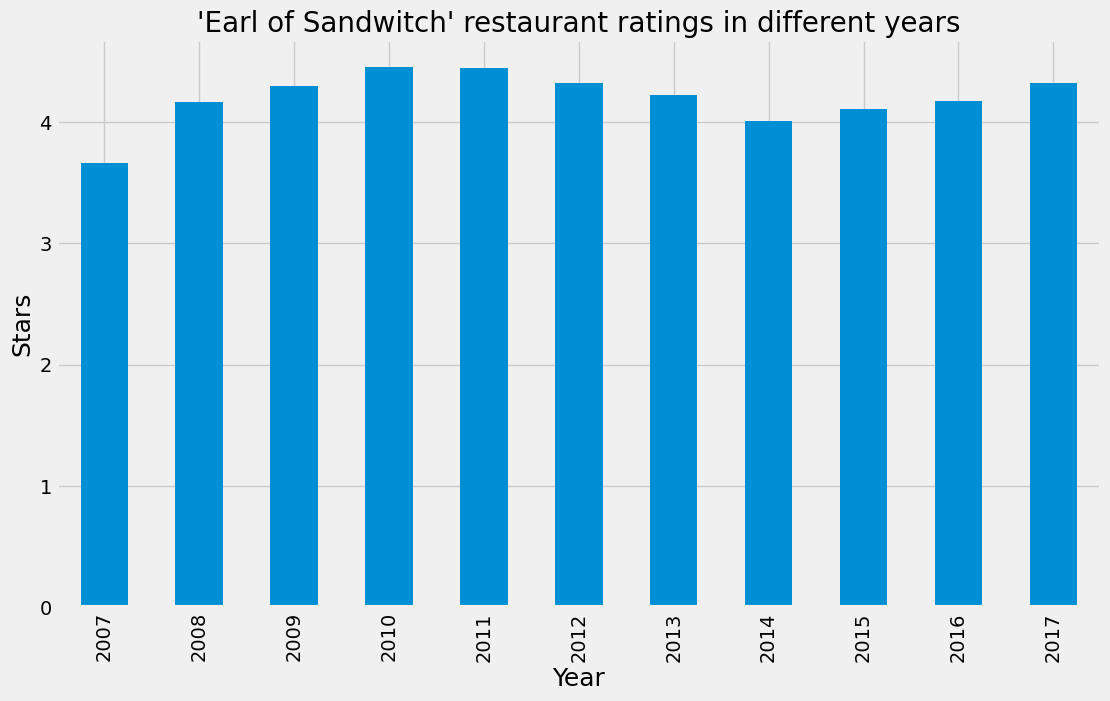

In [20]:
# convert date column to pandas datatime 
df_earl_of_sandwitch_review.date = pd.to_datetime(df_earl_of_sandwitch_review.date)
# now we take the date column as base and count mean of stars of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_earl_of_sandwitch_review.groupby(df_earl_of_sandwitch_review.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7))
# set the title of graph
plt.title("'Earl of Sandwitch' restaurant ratings in different years", fontsize=20)
# set xlabel
plt.xlabel('Year', fontsize=18)
# set ylabel
plt.ylabel('Stars', fontsize=18)
# finally show the plot
plt.show()

Wow! It's look like Earl of Sandwich is always on top. 

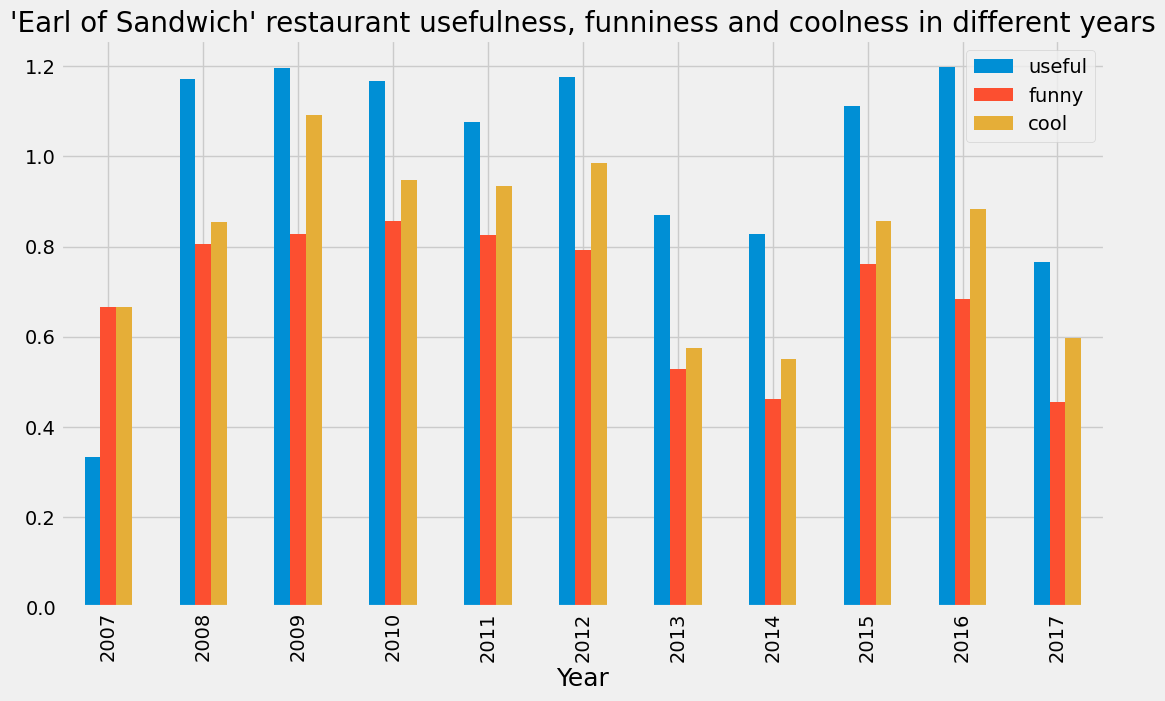

In [21]:
# convert date column to pandas datatime 
df_earl_of_sandwitch_review.date = pd.to_datetime(df_earl_of_sandwitch_review.date)
# now we take the date column as base and count mean of 'useful','funny','cool' of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_earl_of_sandwitch_review.groupby(df_earl_of_sandwitch_review.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(12, 7))
# set the title of graph
plt.title("'Earl of Sandwich' restaurant usefulness, funniness and coolness in different years", fontsize=20)
# add xlabel
plt.xlabel('Year', fontsize=18)
# finally show the plot
plt.show()

It looks like 'Earl of Sandwich' restaurant's usefulness is little down compared to previous years. 

In [22]:
# the dataframe is huge. So we delete the dataframe that we don't need now. 
del df_category_split,df_earl_of_sandwitch_only,df_earl_of_sandwitch_review,df_yelp_business
# let's garbage collector collect garbage
gc.collect()

33518

<a id="mcdonalds"></a>
### 2. Analyze McDonald's reviews
![](https://www.mcdonalds.com/content/dam/usa/nutrition/items/evm/h-mcdonalds-Quarter-Pounder-with-Cheese-Extra-Value-Meals.png)
>McDonald's is a fast food company that was founded in 1940 as a restaurant operated by Richard and Maurice McDonald, in San Bernardino, California, United States. They rechristened their business as a hamburger stand. In this section, I will analyze McDonald's customer's reviews on Yelp! 


In [23]:
# filter mcdonalds
df_mcdonalds_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == '"McDonald\'s"']
# filter reviews for only McDonalds
df_mcdonalds_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_mcdonalds_only.business_id)]
# pre process the text
df_mcdonalds_review['text_clear'] = df_mcdonalds_review['text'].apply(preprocess)

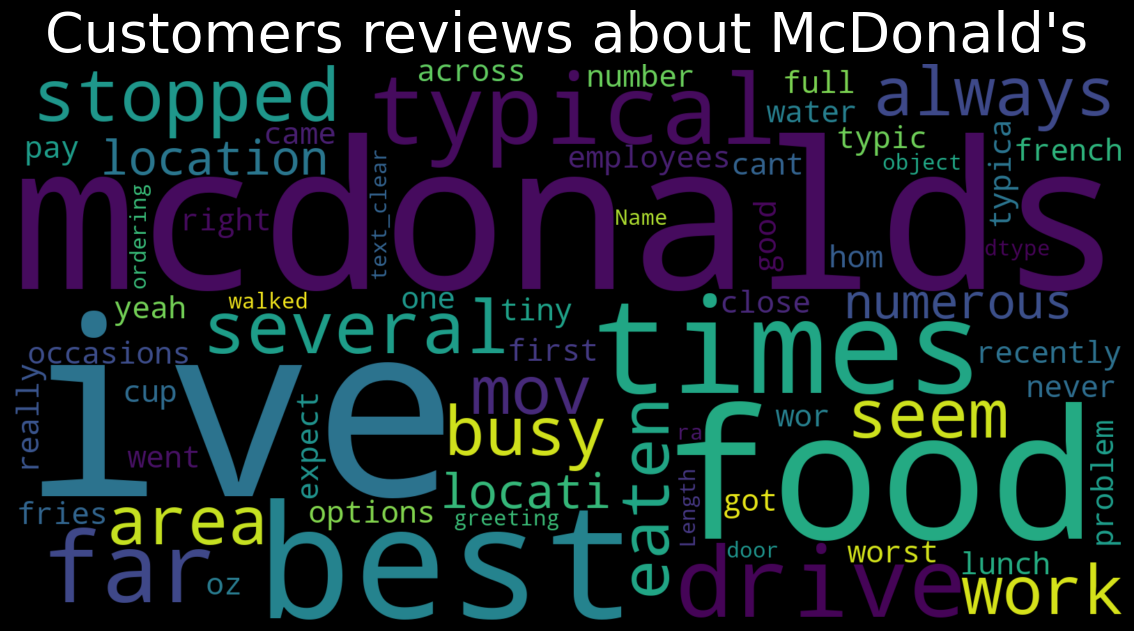

In [24]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_mcdonalds_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about McDonald's", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

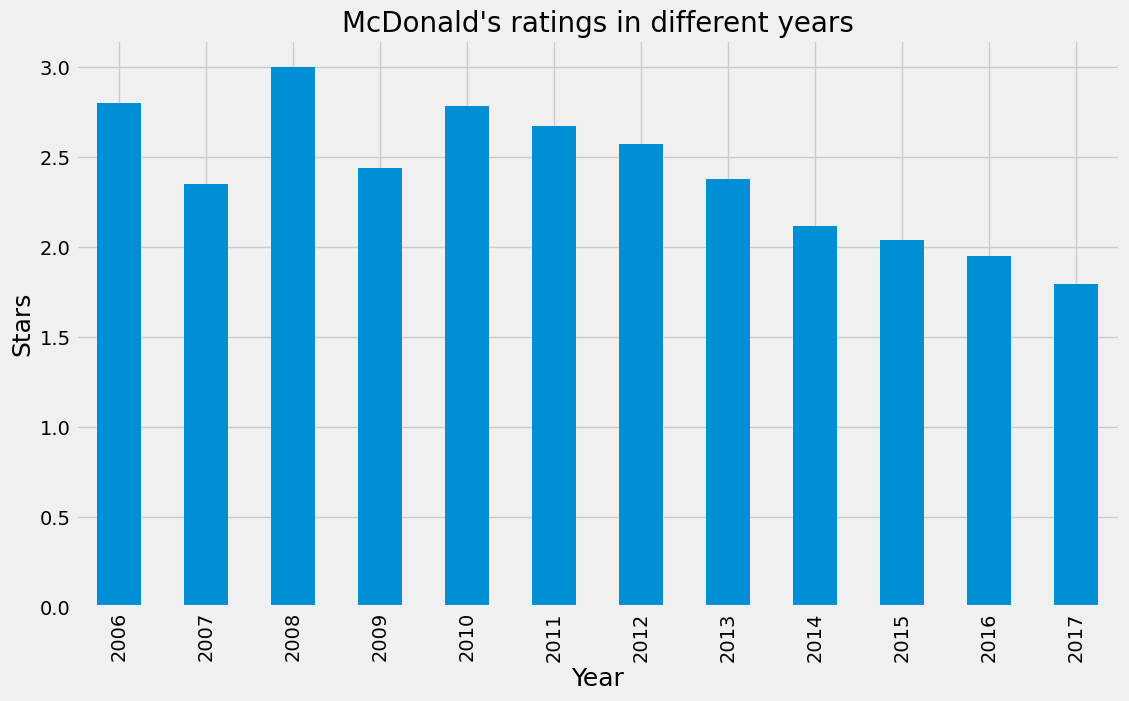

In [25]:
# convert data column to pandas datetime
df_mcdonalds_review.date = pd.to_datetime(df_mcdonalds_review.date)
# now we take the date column as base and count mean of stars of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_mcdonalds_review.groupby(df_mcdonalds_review.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7))
# add the title of plot
plt.title("McDonald's ratings in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
# finally plot the graph
plt.show()

It looks like McDonald's getting fewer stars on Yelp! 

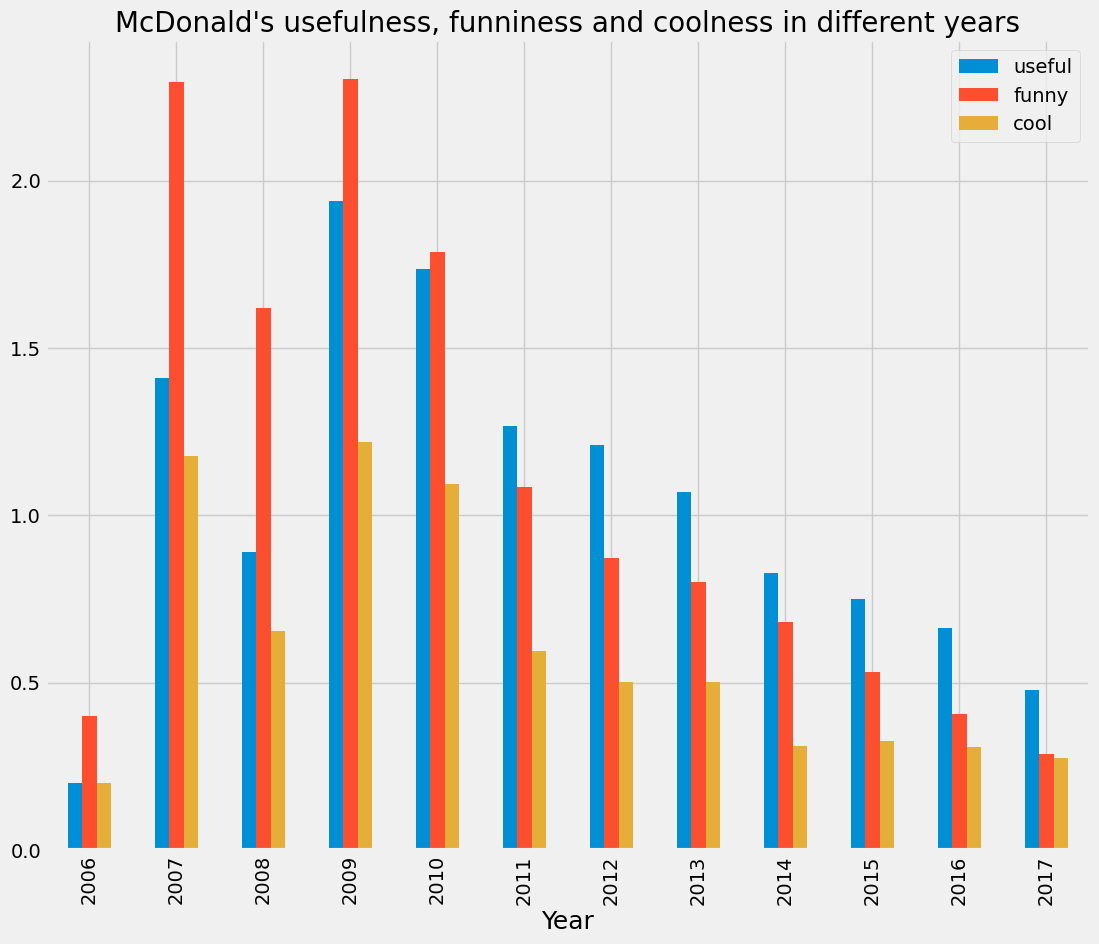

In [26]:
# convert data column to pandas datetime
df_mcdonalds_review.date = pd.to_datetime(df_mcdonalds_review.date)
# now we take the date column as base and count mean of stars of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_mcdonalds_review.groupby(df_mcdonalds_review.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(12, 10))
# add the title of plot
plt.title("McDonald's usefulness, funniness and coolness in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
# finally plot the graph
plt.show()

The graph is self-explanatory. It looks like McDonald's overall performance is decreasing in Yelp! 

In [27]:
# delete what we don't need anymore
del df_mcdonalds_only,df_mcdonalds_review
gc.collect()

9187

<a id="subways_reviews"></a>
### 3. Analyze Subway's restaurant reviews
![](https://rde-stanford-edu.s3.amazonaws.com/Hospitality/Images/subway-header.jpg)
> Subway is a privately held American fast food restaurant franchise that primarily purveys submarine sandwiches and salads. In this section, I will analyze McDonald's customer's reviews on Yelp! 

In [28]:
# filter mcdonalds
df_subway_only = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == '"Subway"']
# filter reviews for only Subways
df_subway_review = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_subway_only.business_id)]

In [29]:
# preprocess the text
df_subway_review['text_clear'] = df_subway_review['text'].apply(preprocess)

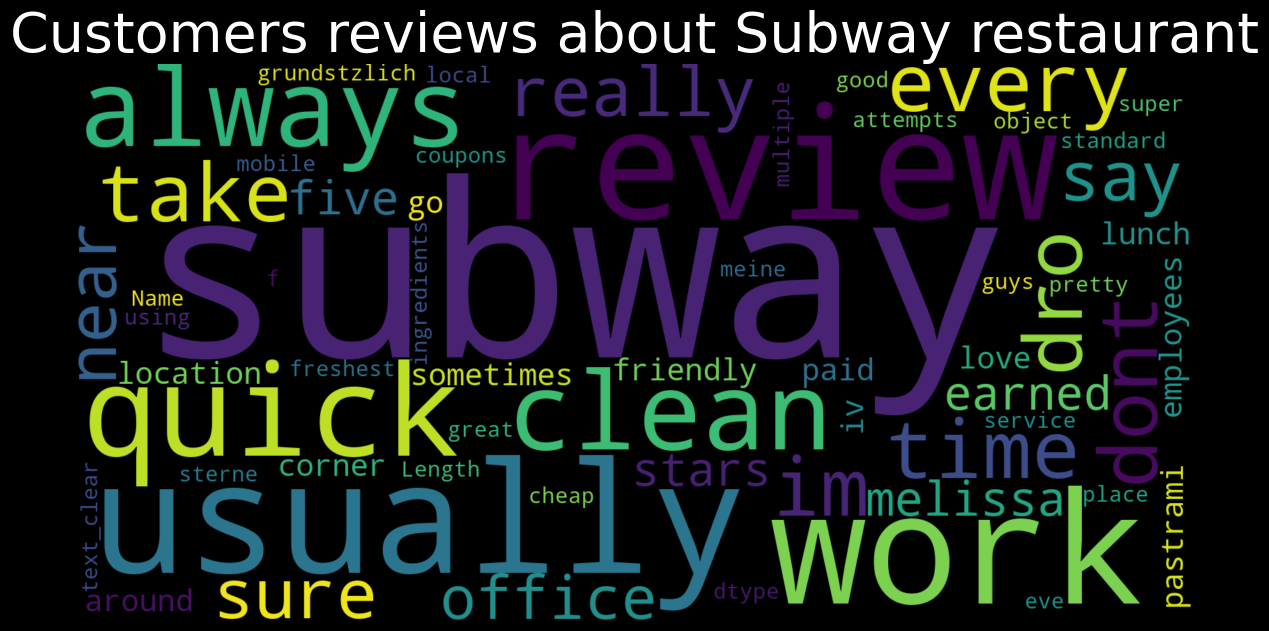

In [30]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_subway_review['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
# title of the graph
plt.title("Customers reviews about Subway restaurant", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the word cloud
plt.show()

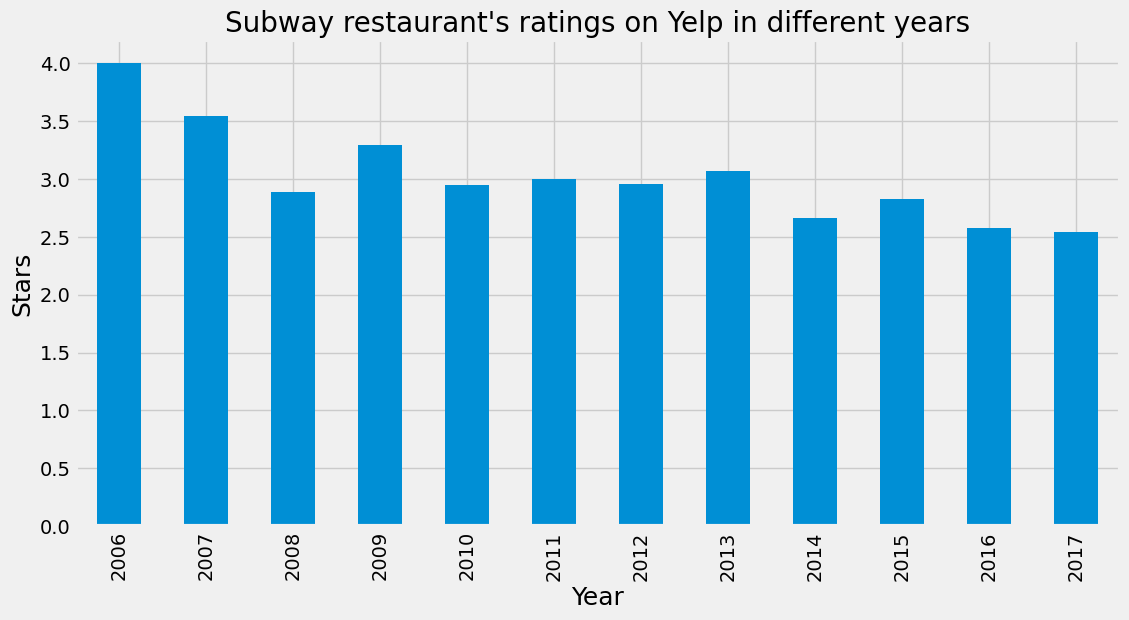

In [31]:
# convert date column to pandas datetime
df_subway_review.date = pd.to_datetime(df_subway_review.date)
# now we take the date column as base and count mean of stars of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_subway_review.groupby(df_subway_review.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 6))
# add the title 
plt.title("Subway restaurant's ratings on Yelp in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
# finally show the plot
plt.show()

It looks like Subway's ratings are constant in different years. 

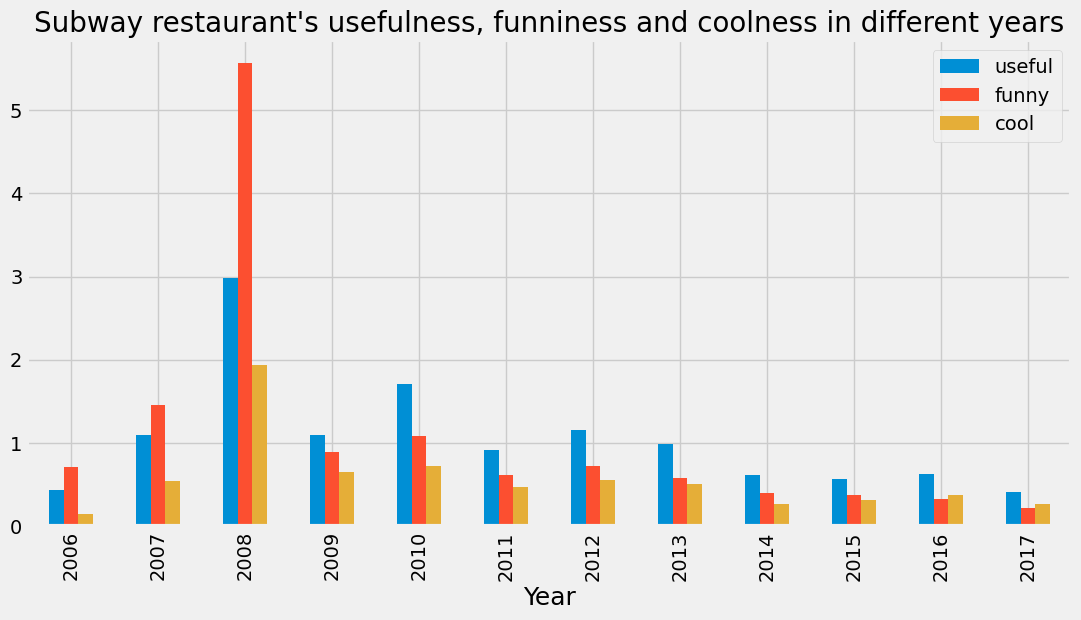

In [32]:
# convert date column to pandas datetime
df_subway_review.date = pd.to_datetime(df_subway_review.date)
# now we take the date column as base and count mean of 'useful','funny','cool' of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_subway_review.groupby(df_subway_review.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(12, 6))
# add the title
plt.title("Subway restaurant's usefulness, funniness and coolness in different years", fontsize=20)
plt.xlabel('Year', fontsize=18)
# finally show the plot
plt.show()

It looks like Subway's average usefulness, coolness and funniness are decreasing compared to previous year. 

In [33]:
# delete what we don't need anymore.
del df_subway_only,df_subway_review, df_review_top,df_yelp_business_restaurants,df_yelp_review
gc.collect()

9534

> ## Big Data Analysis Process
>### Data Collection: Social media monitoring, customer feedback, surveys
>### Data Processing: Clean and preprocess data using Hadoop and Spark
>### Data Analysis: Identify patterns and trends using Python and machine learning algorithms
>### Insights Generation: Visualize data and derive actionable insights using Tableau

> ## Required Technologies
> ### Technologies Needed
> ### Data Storage: Cloud-based solutions like AWS or Google Cloud
> ### Data Management: Hadoop ecosystem for storage and processing
> ### Analytical Tools: Spark for data processing, Python for analysis
> ### Visualization: Tableau for creating interactive dashboards
> ### Procurement Strategies: Subscription models, leveraging free tiers for startups

> ## Customer Data Usage
> ### Usage: Improve services, personalized marketing
> ### Privacy Policies:
> ### Compliance with GDPR and other regulations
> ### Transparency in data collection and usage
> ### Secure data storage and access controls

> ## Type of Staff Needed
> ### Data Analysts: Skilled in data processing and analysis
> ### Marketing Experts: Experienced in digital marketing and customer engagement
> ### IT Support: Ensures smooth operation of data tools and technologies

> ## Overall Budget
> ### Total Budget: $100,000
> ### Breakdown:
> ### Data tools and technologies: 40% ($40,000)
> ### Marketing: 30% ($30,000)
> ### Staff salaries: 20% ($20,000)
> ### Miscellaneous: 10% ($10,000)

> ## Walk-through: A Day at Your Café
> ### Morning:
> #### Collect customer feedback through surveys
> #### Analyze previous day's sales and customer data
> ### Midday:
> #### Adjust marketing strategies based on data insights
> #### Monitor social media for real-time feedback
> ### Afternoon:
> #### Update menu and promotions based on customer preferences
> #### Engage with customers through personalized offers
> ### Evening:
> #### Review daily performance metrics
> #### Plan next day's activities based on data analysis